In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
cd /content/gdrive/MyDrive/ML

/content/gdrive/.shortcut-targets-by-id/1aThnUmKhvLmAyjVTyp__nSlhySgRxpUj/ML


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------
# -------      import keras     -------
# -------------------------------------
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras.models import load_model
from keras import regularizers

#Load the Fashion-MNIST Data Set
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train/255
x_test = x_test/255
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

4431872/4422102 [==============================] - 0s 0us/step


313/313 [==============================] - 2s 5ms/step - loss: 0.2543 - accuracy: 0.9353
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_15 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 dropout_16 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (N

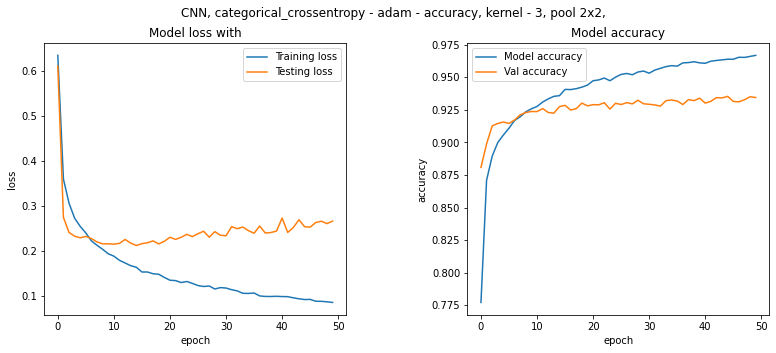

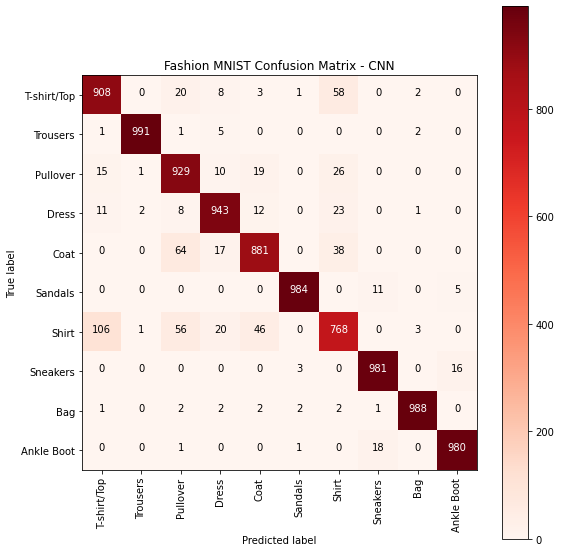

In [ ]:
# Test case 1
'''
kernel_size = 3
pool_size = 2
optimizer = adam
loss = categorical_crossentropy
'''
cnn = Sequential()

cnn.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1),padding='same'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))

cnn.add(Conv2D(32, kernel_size=3, activation='relu',padding='same'))
cnn.add(Dropout(0.2))

cnn.add(Conv2D(24, kernel_size=3, activation='relu',padding='same'))
cnn.add(Dropout(0.2))

cnn.add(Conv2D(64, kernel_size=3, activation='relu',padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.3))

cnn.add(Dense(10, activation='softmax'))

cnn.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# ModelCheckpoint allows us to extract the best model.
# Under different circumstances, we might monitor validation loss instead of validation accuracy.
epochs = 50
verbose = 0
batch_size = 128

callback_list = [ModelCheckpoint(filepath='/content/drive/MyDrive/ML/cnn.h5', monitor='val_accuracy', save_best_only=True, mode='max')]

H = cnn.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=epochs, batch_size=batch_size, verbose=verbose,callbacks=callback_list)

# Result
fig = plt.figure(figsize=(13, 5))
fig.subplots_adjust(hspace=1, wspace=0.4)
plt.suptitle("CNN, categorical_crossentropy - adam - accuracy, kernel - 3, pool 2x2, ")
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(H.history["loss"],label='Training loss')
ax1.plot(H.history["val_loss"],label='Testing loss')
ax1.title.set_text("Model loss with")
ax1.set_ylabel("loss")
ax1.set_xlabel("epoch")
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(H.history["accuracy"],label='Model accuracy')
ax2.plot(H.history["val_accuracy"],label='Val accuracy')
ax2.title.set_text("Model accuracy")
ax2.set_ylabel("accuracy")
ax2.set_xlabel("epoch")
ax2.legend()

# Check loss & accuracy
# Load in the best model state from ModelCheckpoint
cnn_best = load_model('/content/drive/MyDrive/ML/cnn.h5')
# Confirm loss and accuracy on the test data
cnn_best.evaluate(x_test,y_test)
cnn_best.summary()

from sklearn.metrics import confusion_matrix
from itertools import product

classes = ['T-shirt/Top','Trousers','Pullover','Dress','Coat','Sandals','Shirt','Sneakers','Bag','Ankle Boot']

# Create Multiclass Confusion Matrix

y_hat = cnn_best.predict(x_test)
cfs_mt = confusion_matrix( np.argmax(y_test,axis=1), np.argmax(y_hat,axis=1) )

plt.figure( figsize=(8,8) )
plt.imshow( cfs_mt, cmap=plt.cm.Reds )
plt.title('Fashion MNIST Confusion Matrix - CNN')
plt.colorbar()
plt.xticks(np.arange(10), classes, rotation=90)
plt.yticks(np.arange(10), classes)

for i, j in product(range(cfs_mt.shape[0]), range(cfs_mt.shape[1])):
    plt.text(j, i, cfs_mt[i, j],
             horizontalalignment="center", 
             color="white" if cfs_mt[i, j] > 500 else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label');

313/313 [==============================] - 2s 6ms/step - loss: 0.0571 - accuracy: 0.8866
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 32)        544       
                                                                 
 batch_normalization_5 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_25 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        16416     
                                                                 
 dropout_26 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (N

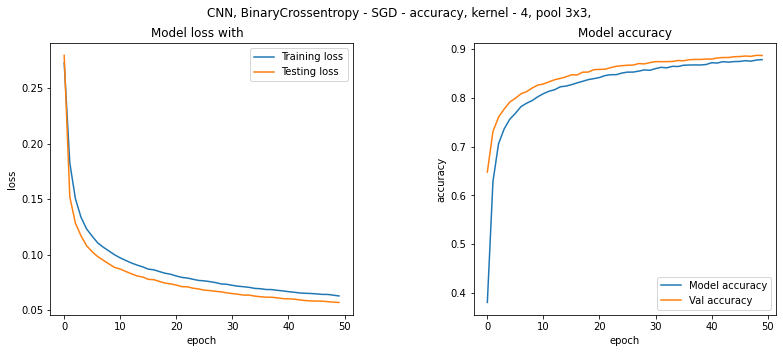

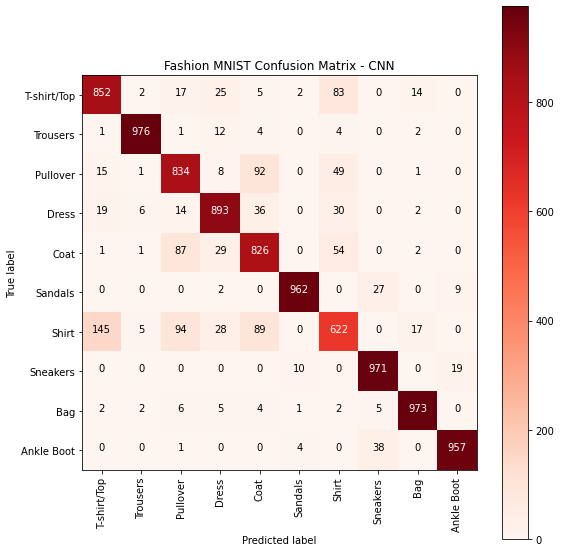

In [13]:
#Test case 2
'''
kernel_size = 4
pool_size = 3x3
optimizer = SGD
loss = BinaryCrossentropy
'''
cnn1 = Sequential()

cnn1.add(Conv2D(32, kernel_size=4, activation='relu', input_shape=(28,28,1),padding='same'))
cnn1.add(BatchNormalization())
cnn1.add(Dropout(0.2))

cnn1.add(Conv2D(32, kernel_size=4, activation='relu',padding='same'))
cnn1.add(Dropout(0.2))

cnn1.add(Conv2D(24, kernel_size=4, activation='relu',padding='same'))
cnn1.add(Dropout(0.2))

cnn1.add(Conv2D(64, kernel_size=4, activation='relu',padding='same'))
cnn1.add(MaxPooling2D(pool_size=(3,3)))
cnn1.add(Dropout(0.2))
cnn1.add(Flatten())

cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dropout(0.3))

cnn1.add(Dense(10, activation='softmax'))

cnn1.compile(optimizer='SGD', metrics=['accuracy'], loss='BinaryCrossentropy')

#ModelCheckpoint allows us to extract the best end-of-epoch model.
#Under different circumstances, we might monitor validation loss instead of validation accuracy.
batch_size = 128
epochs = 50
verbose = 0
callback_list1=[ModelCheckpoint(filepath='/content/drive/MyDrive/ML/cnn1.h5', 
                                monitor='val_accuracy', save_best_only=True, mode='max')]
H1 = cnn1.fit(x_train,y_train, validation_data=(x_test,y_test), epochs = epochs,
                    batch_size=batch_size, verbose=verbose,callbacks=callback_list1)

# Result
fig = plt.figure(figsize=(13, 5))
fig.subplots_adjust(hspace=1, wspace=0.4)
plt.suptitle("CNN, BinaryCrossentropy - SGD - accuracy, kernel - 4, pool 3x3, ")
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(H1.history["loss"],label='Training loss')
ax1.plot(H1.history["val_loss"],label='Testing loss')
ax1.title.set_text("Model loss with  ")
ax1.set_ylabel("loss")
ax1.set_xlabel("epoch")
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(H1.history["accuracy"],label='Model accuracy')
ax2.plot(H1.history["val_accuracy"],label='Val accuracy')
ax2.title.set_text("Model accuracy")
ax2.set_ylabel("accuracy")
ax2.set_xlabel("epoch")
ax2.legend()

# Check loss & accuracy
# Load in the best model state from ModelCheckpoint
cnn_best1 = load_model('/content/drive/MyDrive/ML/cnn1.h5')
# Confirm loss and accuracy on the test data
cnn_best1.evaluate(x_test,y_test)
cnn_best1.summary()

#Create Multiclass Confusion Matrix test case 2

y_cap = cnn_best1.predict(x_test)
cfs_mt1 = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(y_cap,axis=1))

plt.figure(figsize=(8,8))
plt.imshow(cfs_mt1, cmap=plt.cm.Reds)
plt.title('Fashion MNIST Confusion Matrix - CNN')
plt.colorbar()
plt.xticks(np.arange(10), classes, rotation=90)
plt.yticks(np.arange(10), classes)

for i, j in product(range(cfs_mt1.shape[0]), range(cfs_mt1.shape[1])):
    plt.text(j, i, cfs_mt1[i, j],
    horizontalalignment="center",
    color="white" if cfs_mt1[i, j] > 500 else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label');